In [61]:
import sys
sys.path.append("../../common")

from itertools import count, combinations
import matplotlib.pyplot as plt
import numpy as np
import re
import shapely
from tqdm import tqdm
from IPython.display import clear_output

In [73]:
squares = {}
with open("./puzzle_inputs/03.txt") as f:
    for line in f:
        id, x, y, w, h = map(int, re.findall(r"#(\d+) @ (\d+),(\d+): (\d+)x(\d+)", line)[0])
        squares[id] = shapely.Polygon([
            (x, y),
            (x + w, y),
            (x + w, y + h),
            (x, y + h)
        ])

In [74]:
result = []
for a, b in tqdm(combinations(squares.values(), 2)):
    result.append(a.intersection(b))
int(shapely.union_all(result).area)

856086it [00:06, 133450.03it/s]


109716

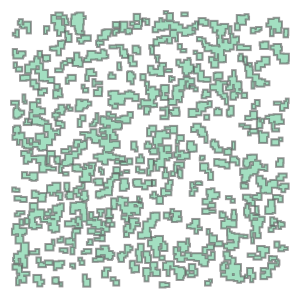

In [78]:
shapely.union_all(list(squares.values()))

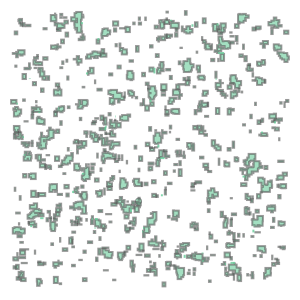

In [79]:
shapely.union_all(result)

In [76]:
for id, a in squares.items():
    if any(b.intersects(a) for (id_b, b) in squares.items() if id_b != id):
        continue
    print(id)
    break

124
